# Semiconductor Wafer Map Analysis Notebook

This Jupyter notebook provides tools for analyzing a wafer map datase, focusing on wafer failure patterns classification and visualization. The notebook loads semiconductor wafer map data, processes it into labeled and unlabeled datasets, and visualizes different failure types.

This notebook serves as a foundation for semiconductor wafer failure pattern analysis and can be extended for machine learning tasks such as failure classification, anomaly detection, or pattern recognition.

## Dataset Overview

The Large Semiconductor Wafer Map Dataset contains:
- **811,457 total records** of semiconductor wafer maps
- **172,950 labeled samples** with failure type classifications
- **638,507 unlabeled samples**
- 9 distinct failure pattern classifications

## Data Structure

The dataset contains the following columns:
- **waferMap**: 2D array representing the die pattern on a wafer (0 = no die, 1 = pass, 2 = fail)
- **dieSize**: Numerical value indicating the size of individual dies
- **lotName**: String identifier for the manufacturing lot
- **waferIndex**: Numerical index of the wafer within its lot
- **trainTestLabel**: Classification of data as "Training" or "Test" set
- **failureType**: Type of failure pattern observed on the wafer

## Failure Types

The dataset contains 9 distinct failure pattern categories:
1. **none**: No failure pattern (147,431 samples)
2. **Edge-Ring**: Failures in a ring pattern at the wafer edge (9,680 samples)
3. **Edge-Loc**: Failures localized at the edge of the wafer (5,189 samples)
4. **Center**: Failures concentrated in the wafer center (4,294 samples)
5. **Loc**: Localized failure pattern (3,593 samples)
6. **Scratch**: Linear scratch-like failure pattern (1,193 samples)
7. **Random**: Randomly distributed failures (866 samples)
8. **Donut**: Ring-shaped failure pattern (555 samples)
9. **Near-full**: Almost complete wafer failure (149 samples)

## Code Functionality

The notebook implements the following key functionalities:

1. **Data Loading**: Loads the LSWMD dataset from a pickle file
2. **Data Processing**: Separates data into labeled and unlabeled datasets
3. **Data Analysis**: Examines distribution of failure types and dataset structure
4. **Visualization**: Creates visual representations of different wafer failure patterns

## Key Functions

### `show_samples(wafer, failureType)`

Displays a sample of wafer maps for a specified failure type.

**Parameters:**
- **wafer**: Dictionary containing dataframes for each failure type
- **failureType**: String specifying the failure pattern to visualize (one of the 9 categories)

**Output:**
- A figure with 8 randomly selected wafer maps of the specified failure type, displayed using the 'cividis' colormap

## Usage Notes

1. The initial data loading may take significant time (~37 seconds) due to the large dataset size
2. The wafer map arrays have varying dimensions based on the specific wafer
3. The dataset shows significant class imbalance, with "none" being the dominant category
4. Die values are encoded as: 0 = no die, 1 = pass, 2 = fail

## Data Cleaning

The notebook verifies that the dataset contains no missing values through null checks, ensuring data integrity for further analysis and modeling.



In [ ]:
pip install numpy pandas matplotlib

In [2]:
import sys
import pickle
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw

### Load the data from the pickle file

In [3]:
%%time
try:
    df = pd.read_pickle(r"local_data/LSWMD.pkl")
    print("Pickle file read successfully")
except Exception as e:
    print(f"Error reading pickle file: {e}")


Pickle file read successfully
CPU times: user 3.74 s, sys: 2.87 s, total: 6.61 s
Wall time: 8.07 s


### Get dimensions of the data

In [4]:
df.shape[0]

811457

In [5]:
df.shape[1]

6

### Verify that fields have values

In [6]:
df.count()

dieSize           811457
failureType       811457
lotName           811457
trainTestLabel    811457
waferIndex        811457
waferMap          811457
dtype: int64

### Check data types

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 811457 entries, 0 to 811456
Data columns (total 6 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   dieSize         811457 non-null  float64
 1   failureType     811457 non-null  object 
 2   lotName         811457 non-null  object 
 3   trainTestLabel  811457 non-null  object 
 4   waferIndex      811457 non-null  float64
 5   waferMap        811457 non-null  object 
dtypes: float64(2), object(4)
memory usage: 37.1+ MB


### Display the dataframe (truncated automatically)

In [8]:
display(df)

,dieSize,failureType,lotName,trainTestLabel,waferIndex,waferMap
0,1683.0,none,lot1,Training,1.0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
1,1683.0,none,lot1,Training,2.0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
2,1683.0,none,lot1,Training,3.0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
3,1683.0,none,lot1,Training,4.0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
4,1683.0,none,lot1,Training,5.0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
...,...,...,...,...,...,...
811452,600.0,Edge-Ring,lot47542,Test,23.0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 1,..."
811453,600.0,Edge-Loc,lot47542,Test,24.0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 1, 1,..."
811454,600.0,Edge-Ring,lot47542,Test,25.0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 1,..."
811455,600.0,"[0, 0]",lot47543,"[0, 0]",1.0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,..."


In [9]:
print(f"Total records: {len(df)}")
print(f"Datafram shape: {df.shape}")

Total records: 811457
Datafram shape: (811457, 6)


## Data Preprocessing: Separating Labeled and Unlabeled Wafer Maps

This code block processes the raw WM-811K semiconductor wafer dataset to separate labeled and unlabeled data.

### Functionality

1. **Initialization**:
   - Creates two empty lists: `labeled` for wafers with failure type classifications and `unlabeled` for wafers without classifications

2. **Data Processing Loop**:
   - Iterates through each row of the original DataFrame (`df`)
   - Attempts to extract training/test labels and failure type information

3. **Labeled Data Extraction**:
   - For properly labeled wafers, extracts:
     - The actual wafer map (`waferMap`)
     - Die size information (`dieSize`)
     - Manufacturing lot name (`lotName`)
     - Wafer index within the lot (`waferIndex`)
     - Training/test designation (`label`)
     - Failure pattern classification (`failureType`)
   - Adds this information to the `labeled` list

4. **Unlabeled Data Handling**:
   - When extraction fails (typically due to missing labels), adds the wafer to the `unlabeled` list
   - Maintains the same data structure but with `None` values for label and failure type

5. **DataFrame Creation**:
   - Converts both lists to pandas DataFrames with consistent column names
   - Creates `df_labeled` containing all classified wafers
   - Creates `df_unlabeled` containing all unclassified wafers

### Output

- `df_labeled`: DataFrame containing 172,950 wafers with failure classifications
- `df_unlabeled`: DataFrame containing 638,507 wafers without failure classifications

### Note

This preprocessing step is essential for subsequent analysis as it separates the data into two distinct sets: one suitable for supervised learning (labeled) and one that could be used for unsupervised learning or other analysis techniques (unlabeled).

In [10]:
%%time
labeled = list()
unlabeled = list()

for i, row in df.iterrows():
    label = failureType = None
    try:
        if row['trainTestLabel']:
            label = row['trainTestLabel']
        if row['failureType']:
            failureType =  row['failureType']
        labeled.append([row['waferMap'], row['dieSize'], row['lotName'], row['waferIndex'], label, failureType])
    except:
        unlabeled.append([row['waferMap'], row['dieSize'], row['lotName'], row['waferIndex'], label, failureType])
        
df_labeled = pd.DataFrame(labeled, columns=['waferMap', 'dieSize', 'lotName', 'waferIndex', 'label', 'failureType'])
df_unlabeled = pd.DataFrame(unlabeled, columns=['waferMap', 'dieSize', 'lotName', 'waferIndex', 'label', 'failureType'])

CPU times: user 11.2 s, sys: 404 ms, total: 11.6 s
Wall time: 11.9 s


In [11]:
df_labeled.count()

waferMap       172950
dieSize        172950
lotName        172950
waferIndex     172950
label          172950
failureType    172950
dtype: int64

In [12]:
df_unlabeled.count()

waferMap       638507
dieSize        638507
lotName        638507
waferIndex     638507
label               0
failureType         0
dtype: int64

In [13]:
## Verify that total of labeled and unlabeled equal the total number of wafers
172950 + 638507

811457

In [14]:
display(df_labeled)

,waferMap,dieSize,lotName,waferIndex,label,failureType
0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,1.0,Training,none
1,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,2.0,Training,none
2,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,3.0,Training,none
3,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,4.0,Training,none
4,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,5.0,Training,none
...,...,...,...,...,...,...
172945,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 2,...",600.0,lot47542,21.0,Test,Edge-Loc
172946,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,...",600.0,lot47542,22.0,Test,Edge-Loc
172947,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 1,...",600.0,lot47542,23.0,Test,Edge-Ring
172948,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 1, 1,...",600.0,lot47542,24.0,Test,Edge-Loc


In [15]:
# Print the failure types
print(*df_labeled['failureType'].unique(), sep="\n")

none
Loc
Edge-Loc
Center
Edge-Ring
Scratch
Random
Near-full
Donut


In [16]:
# Print the number of each failure type
df_labeled['failureType'].value_counts()

failureType
none         147431
Edge-Ring      9680
Edge-Loc       5189
Center         4294
Loc            3593
Scratch        1193
Random          866
Donut           555
Near-full       149
Name: count, dtype: int64

In [17]:
# Sort by dieSize
df.sort_values(by='dieSize', ascending=False)

,dieSize,failureType,lotName,trainTestLabel,waferIndex,waferMap
244106,48099.0,"[0, 0]",lot15277,"[0, 0]",25.0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
244110,48099.0,"[0, 0]",lot15279,"[0, 0]",2.0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
244100,48099.0,"[0, 0]",lot15277,"[0, 0]",1.0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
244101,48099.0,"[0, 0]",lot15277,"[0, 0]",3.0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
244102,48099.0,"[0, 0]",lot15277,"[0, 0]",5.0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
...,...,...,...,...,...,...
749737,31.0,"[0, 0]",lot45034,"[0, 0]",7.0,"[[0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
7237,21.0,"[0, 0]",lot292,"[0, 0]",7.0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
7232,21.0,"[0, 0]",lot292,"[0, 0]",1.0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
7236,12.0,"[0, 0]",lot292,"[0, 0]",6.0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."


In [18]:
print(df['trainTestLabel'][1000])
print(df['failureType'][1000])

Training
none


In [19]:
print(df.iloc[1000])

dieSize                                                       533.0
failureType                                                    none
lotName                                                       lot41
trainTestLabel                                             Training
waferIndex                                                      1.0
waferMap          [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 1, 2, 1,...
Name: 1000, dtype: object


In [20]:
df.waferMap[42]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], shape=(53, 58), dtype=uint8)

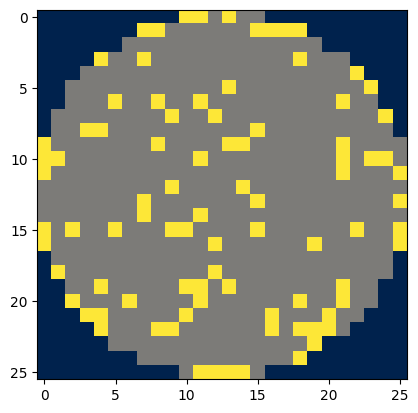

In [21]:
plt.imshow(df.waferMap[1000], 'cividis')

In [22]:
for row in df.waferMap[1000]:
    print(*row)

0 0 0 0 0 0 0 0 0 0 2 2 1 2 1 1 0 0 0 0 0 0 0 0 0 0
0 0 0 0 0 0 0 2 2 1 1 1 1 1 1 2 2 2 2 0 0 0 0 0 0 0
0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0
0 0 0 0 2 1 1 2 1 1 1 1 1 1 1 1 1 1 2 1 1 1 0 0 0 0
0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 0 0 0
0 0 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 2 0 0
0 0 1 1 1 2 1 1 2 1 1 2 1 1 1 1 1 1 1 1 1 2 1 1 0 0
0 1 1 1 1 1 1 1 1 2 1 1 2 1 1 1 1 1 1 1 1 1 1 1 2 0
0 1 1 2 2 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 0
2 1 1 1 1 1 1 1 2 1 1 1 1 2 2 1 1 1 1 1 1 2 1 1 1 1
2 2 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 2 1 2 2 1
2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 2
1 1 1 1 1 1 1 1 1 2 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1
1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 2
1 1 1 1 1 1 1 2 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1
2 1 2 1 1 2 1 1 1 2 2 1 1 1 1 2 1 1 1 1 1 1 2 1 1 2
2 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 2 1 1 1 1 1 2
0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0
0 2 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 0
0 0 1 1 2 1 

In [23]:
wafer_failures = dict()
for f in df_labeled['failureType'].unique():
    wafer_failures[f] = df_labeled[df_labeled['failureType'] == f]        

In [24]:
def show_samples(wafer, failureType) -> None:
    """Displays a sample of images for a failure type

    input:
      images: list() of images
      
      failureType: string:  
            none
            Loc
            Edge-Loc
            Center
            Edge-Ring
            Scratch
            Random
            Near-full
            Donut

    output: none - displays images

    """
    # Create a figure and a grid of subplots
    fig, axes = plt.subplots(1, 8, figsize=(10, 10))
    
    img_n=0
    for i, row in wafer[failureType].sample(8).iterrows():
        wafer_info = str(row['lotName']) + "wfr" + str(row['waferIndex'])
        axes[img_n].imshow(row['waferMap'], 'cividis', extent=[0,100,0,1], aspect=100)
        axes[img_n].set_title(wafer_info, size=8)
        axes[img_n].set_xlabel(row['failureType'], size=8)
        axes[img_n].get_xaxis().set_ticks([])
        axes[img_n].get_yaxis().set_ticks([])
        axes[img_n].axis('on')
        img_n+=1

    plt.show()
    
    # Show the plot

none


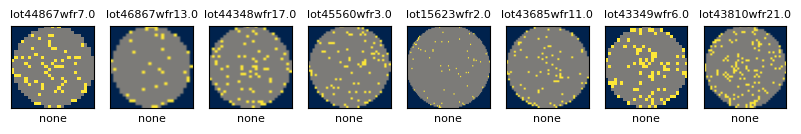

Loc


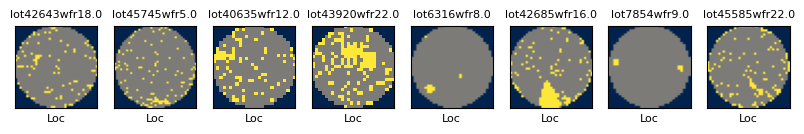

Edge-Loc


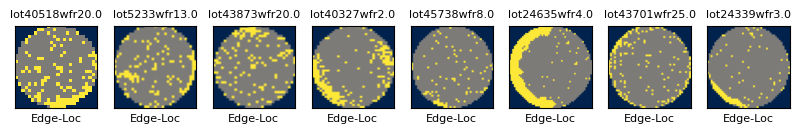

Center


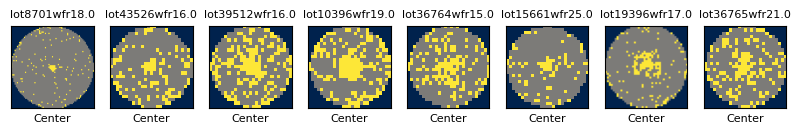

Edge-Ring


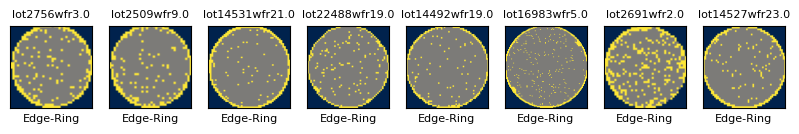

Scratch


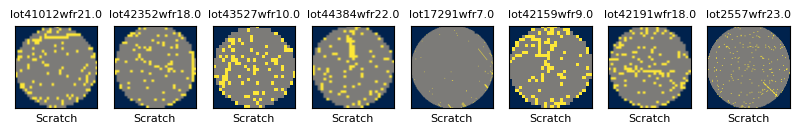

Random


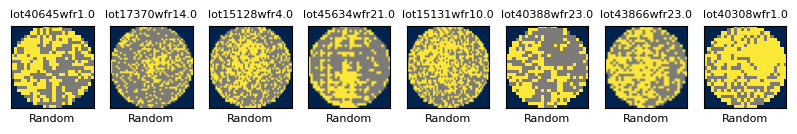

Near-full


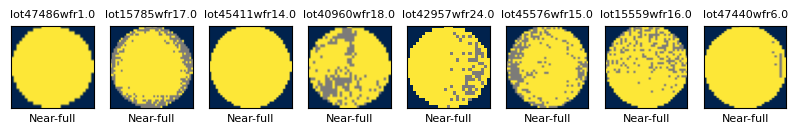

Donut


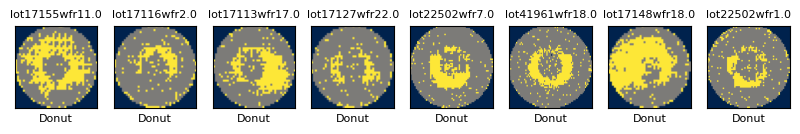

In [25]:
for f in df_labeled['failureType'].unique():
    b_start='\033[1m'
    b_end='\033[0m'
    print(f"{b_start}{f}{b_end}")
    show_samples(wafer_failures, f)

In [26]:
print(df.isnull().sum())
df.dropna() # Remove rows with missing values
df.fillna(0) # Fill missing values

dieSize           0
failureType       0
lotName           0
trainTestLabel    0
waferIndex        0
waferMap          0
dtype: int64


,dieSize,failureType,lotName,trainTestLabel,waferIndex,waferMap
0,1683.0,none,lot1,Training,1.0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
1,1683.0,none,lot1,Training,2.0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
2,1683.0,none,lot1,Training,3.0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
3,1683.0,none,lot1,Training,4.0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
4,1683.0,none,lot1,Training,5.0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
...,...,...,...,...,...,...
811452,600.0,Edge-Ring,lot47542,Test,23.0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 1,..."
811453,600.0,Edge-Loc,lot47542,Test,24.0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 1, 1,..."
811454,600.0,Edge-Ring,lot47542,Test,25.0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 1,..."
811455,600.0,"[0, 0]",lot47543,"[0, 0]",1.0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,..."
